# CMA Lab Assignment 

Juul Van Derbeken 02104447 <br>
& Leen van Kerckhoven 02008034

In [4]:
import numpy as np
import csv
import openpyxl
import matplotlib.pyplot as plt
import scipy.signal as sg

## 1. 3D marker trajectory
Using the 3D marker trajectory data collected in the gait laboratory during each of 3 walking
trials calculate:
Mean walking speed (& Standard deviation)
Mean Stride length (& Standard deviation)
Explain exactly how the raw trajectory data was used in this calculation (& submit an excel
file with the raw data and calculations within it)
To which anthropometric parameter would you expect the stride length to be related and
why?

<font color=blue>
Antropometric parameter: leg length of the subject.

P.S. In the following calculations, we noticed that right heel and right toe data were switched in Trial 3 so we switched them back in our code. 
    </font>

In [5]:
G2A_1_input = '.\Group 3B.xlsx'
G2A_1 = openpyxl.load_workbook(G2A_1_input)
SN1 = G2A_1.sheetnames #Sheet Names

T1 = np.array([[el.value for el in rij] for rij in G2A_1[SN1[0]].rows])[14:,2:].T #First Trial, None values for rows < 14
T2 = np.array([[el.value for el in rij] for rij in G2A_1[SN1[1]].rows])[5:,2:].T #Second Trial
T3 = np.array([[el.value for el in rij] for rij in G2A_1[SN1[2]].rows])[5:,2:].T #Third Trial
#T3[[6,9]], T3[[7,10]],T3[[8,11]] = T3[[9,6]], T3[[10,7]],T3[[11,8]]
T = [T1, T2, T3]

### Walking speed
<font color=blue>
For each trial, we calculated mean of the derivative of the thigh, knee, toe and heel location (left and right) and took the mean of all locations. This equals to the walking speed.  
    </font>

Average speed for Trial 0 =  14.581372168346775  and std =  0.4752080816949571
Average speed for Trial 1 =  13.416567284511787  and std =  0.3192772781684041
Average speed for Trial 2 =  12.605111898310597  and std =  0.9722053145856789


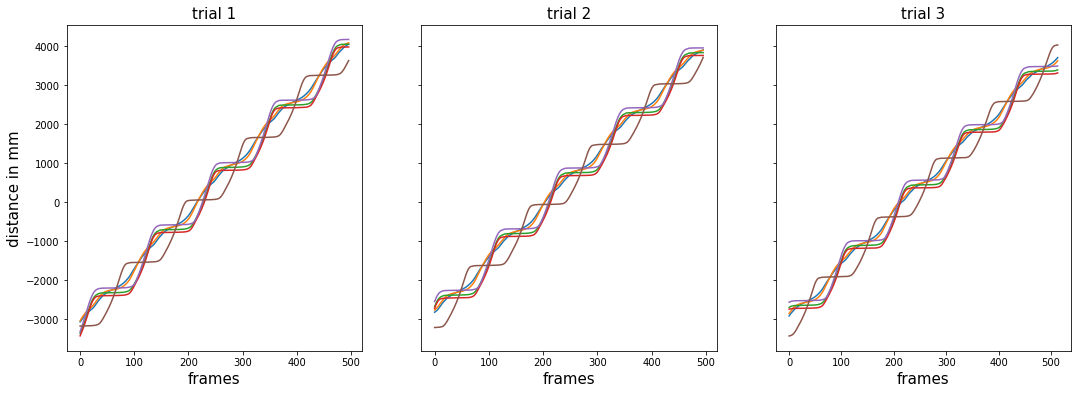

In [12]:
fig, ax = plt.subplots(1,3, figsize = (18,6),sharey=True)
ax[0].set_ylabel('distance in mm', fontsize=15)

for i, t in enumerate(T):
    AS = [] # average speeds
    for y in t[1::3]:
        v = np.diff(y) # instantanious speeds
        ASL = np.mean(v) # averaged speed
        AS.append(ASL)
        ax[i].plot(y), ax[i].set_title(f'trial {i+1}', fontsize=15), ax[i].set_xlabel("frames", fontsize=15)
    
    AS = np.array(AS) 
    speed = np.mean(AS) #Average speed averaged for all locations
    std = np.std(AS)
    print(f'Average speed for Trial {i} = ',speed, ' and std = ', std)
plt.show()

### Stride Length
<font color=blue>
For calculating the stride length, we calculated the locations of the heel strike by looking at a treshold value in the ankle data where we can see the shock of the heel strike at the marker. We then calculated the distance between each heel strike and averaged them.
    </font>

[1627.986206 1591.0595090000002 1601.9235230000002 1570.4904779999997]
Trial 1: Average stride length is:  1597.864929  and std =  20.7330522493396
[1583.1333009999998 1557.6641840000002 1527.3238529999999
 1551.0598139999997]
Trial 2: Average stride length is:  1554.7952879999998  and std =  19.874022315644154
[1551.5487059999998 1542.19516 1411.096344 1507.4959709999998]
Trial 3: Average stride length is:  1503.0840452500001  and std =  55.587104864084694


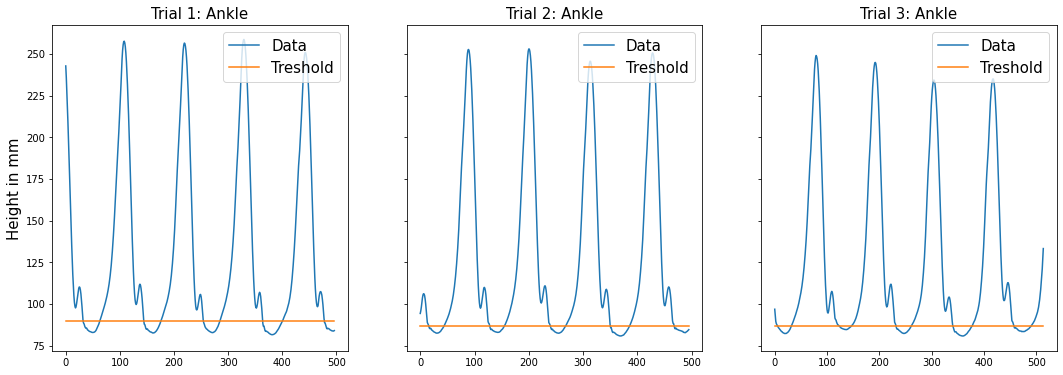

In [21]:
fig, ax = plt.subplots(1,3, figsize = (18,6),sharey=True)
ax[0].set_ylabel('Height in mm', fontsize=15)
AHS = [] # average stride length for each trial. 
for i, t in enumerate(T):
    TAZ = t[8] # Trial Ankle Z-coordinate
    TAY = t[7] # Trial Ankle Y-coordinate (forward movement direction)
    Tp = np.percentile(TAZ, 30) # Treshold at 30%
    TP = np.ones(np.shape(TAZ))*Tp # treshold for graph
    P = np.where(TAZ < Tp, 1, 0) # ones where Trial is under treshold value
    HS = np.where(np.diff(P) == 1) # locations where values dip under treshold values. 
    Y = TAY[HS]

    ax[i].plot(TAZ)
    ax[i].plot(TP)
    ax[i].legend(['Data', 'Treshold'], loc="upper right", fontsize=15)
    ax[i].set_title(f"Trial {i+1}: Ankle", fontsize=15)
    print(np.diff(Y))
    print(f'Trial {i+1}: Average stride length is: ', np.mean(np.diff(Y)), " and std = ", np.std(np.diff(Y)))
plt.show()


## 2. Balance assessment
Do the balance data collected in lab 2 suggest the postural sway of the subject is greater
when standing with eyes open (EO) or eyes closed (EC)*? Explain which parameter you use
to assess this and include the data and calculations in an excel spreadsheet. Provide x-y plots
of the data in addition to the calculations within the spreadsheet.
What result would you expect and why?
What practical measurement factors limit this assessment?
How would you decide what sampling rate to use when designing this protocol?
*If EO versus EC data is not available then compare Left versus Right single leg stance

<font color=blue>
All the visual information contributes to postural stability so we expect that the coordinates for eyes open is more stable than the coordinates for eyes closed. And indeed we can see that postural sway is greater with eyes closed.  We use X and Y Force Vectors. Much greater variation with eyes closed. 
practical measurement factors: falling down
sampling rate: ?
    
</font>

In [34]:
G2A_2_input = '.\Grp 3B Wk 2.xlsx'
G2A_2 = openpyxl.load_workbook(G2A_2_input)
SN2 = G2A_2.sheetnames #Sheet Names

EO = np.array([[el.value for el in rij] for rij in G2A_2[SN2[1]].rows])[6:15006,2:].T #First Trial #15006
EC = np.array([[el.value for el in rij] for rij in G2A_2[SN2[2]].rows])[6:12976,2:].T #Second Trial #12976

EOFX, EOFY, EOFZ = EO[0], EO[1], EO[2] # Eyes Open Force Vectors of x,y,z coordinates
ECFX, ECFY, ECFZ = EC[0], EC[1], EC[2] # Eyes Closed Force Vectors of x,y,z coordinates

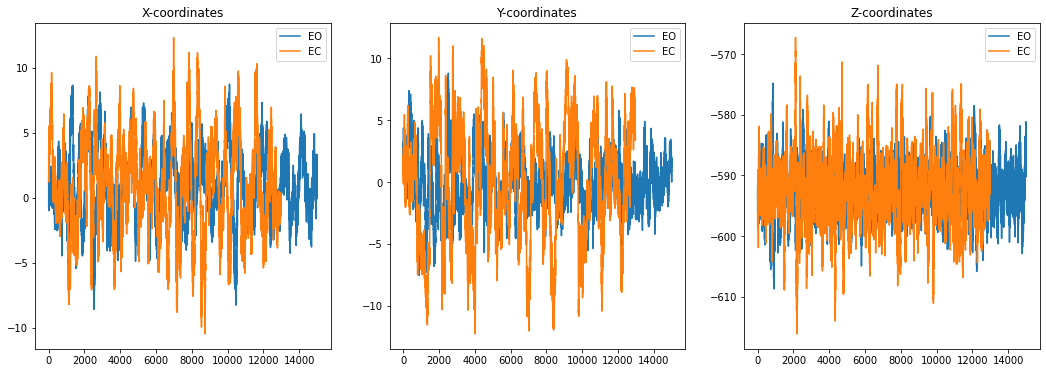

In [36]:
fig, (ax0, ax1,ax2) = plt.subplots(1,3, figsize = (18,6))
ax0.plot(EOFX), ax0.plot(ECFX), ax0.legend(['EO', 'EC']) ,ax0.set_title('X-coordinates')
ax1.plot(EOFY), ax1.plot(ECFY), ax1.legend(['EO', 'EC']) ,ax1.set_title('Y-coordinates')
ax2.plot(EOFZ), ax2.plot(ECFZ), ax2.legend(['EO', 'EC']), ax2.set_title('Z-coordinates')
plt.show()

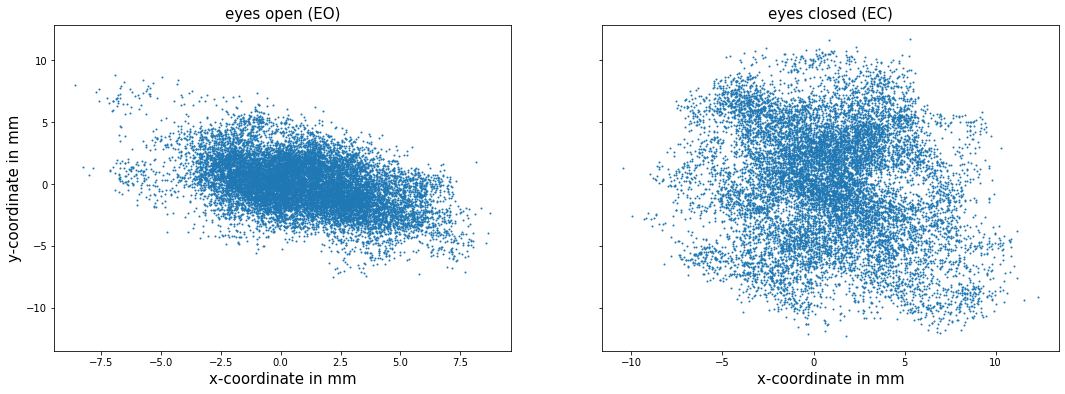

In [37]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize = (18,6), sharey=True)
ax0.scatter(EOFX, EOFY, s=1), ax0.set_title('eyes open (EO)', fontsize=15), ax0.set_xlabel('x-coordinate in mm', fontsize=15), ax0.set_ylabel('y-coordinate in mm', fontsize=15)
ax1.scatter(ECFX, ECFY, s=1), ax1.set_title('eyes closed (EC)', fontsize=15), ax1.set_xlabel('x-coordinate in mm', fontsize=15)
plt.show()

In [39]:
def AMP(x): # calculating AMP
    return np.mean(x)

EOFXs, EOFYs = EOFX - AMP(EOFX), EOFY - AMP(EOFY) # shifting to AMP
ECFXs, ECFYs = ECFX - AMP(ECFX), ECFY - AMP(ECFY) # shifting to AMP

def Mean_radius(x, y):
    r = (x**2 + y**2)**(1/2) # radius
    return np.mean(r), np.std(r)

def Path_length(x, y):
    L = (np.diff(x)**2+np.diff(y)**2)**(1/2) # length
    return np.sum(L)

def Swept_area(x, y):
    r = (x**2 + y**2)**(1/2) # radius
    L = (np.diff(x)**2+np.diff(y)**2)**(1/2) # length
    a, b, c = L, r[:-1], r[1:]
    S = 1/2*(a+b+c)
    A = (S*(S-a)*(S-b)*(S-c))**(1/2)
    return np.sum(A)

print(Mean_radius(EOFXs, EOFYs))
print(Path_length(EOFXs, EOFYs))
print(Swept_area(EOFXs, EOFYs))

print(Mean_radius(ECFXs, ECFYs))
print(Path_length(ECFXs, ECFYs))
print(Swept_area(ECFXs, ECFYs))


(2.8791046679389494, 1.5968822151777091)
15508.363203642573
13936.256611626983
(5.248411909689058, 2.684248189692533)
13462.687498258876
22494.91083429279


### 3. EMG
Compare the raw EMG data of gastrocnemius and tibialis anterior collected during normal
walking to that obtain when toe walking.
Describe and explain the differences between the EMG under the two different walking
conditions
Produce a plot of rectified EMG of gastrocnemius whilst walking on the toes.
How would you derive smooth rectified EMG from this?
How would you derive what should be considered as the resting EMG level?

<font color=blue>
Differences: 
    - Much higher resting state for gastrocnemius as this is the muscle that plantar flexes the foot.
    - Also higher activity of the Tibialis Ant. during walking as this muscle also activates during contraction of the gastrocnemius to keep balance. 
    
How would you derive smooth rectified EMG from this? : Low pass filtering <br>
How would you derive what should be considered as the resting EMG level? : lowest level
    </font>

In [24]:
G2A_3_input = '.\G3B_EMG Lab3.xlsx'
G2A_3 = openpyxl.load_workbook(G2A_3_input)
SN3 = G2A_3.sheetnames #Sheet Names

EN = np.array([[el.value for el in rij] for rij in G2A_3[SN3[0]].rows])[11:10951,2:].T #EMG Normal walking #10951
ET = np.array([[el.value for el in rij] for rij in G2A_3[SN3[1]].rows])[11:11891,2:].T #EMG Toe walking #11891

In [28]:
ENG = EN[0]- EN[1] #EMG Normal-walking Gastrocnemius
ENT = EN[2] - EN[3] #EMG Normal-walking Tibialis-anterior
ETG = ET[0]- ET[1] #EMG Toe-walking Gastrocnemius
ETT = ET[2] - ET[3] #EMG Toe-walking Tibialis-anterior

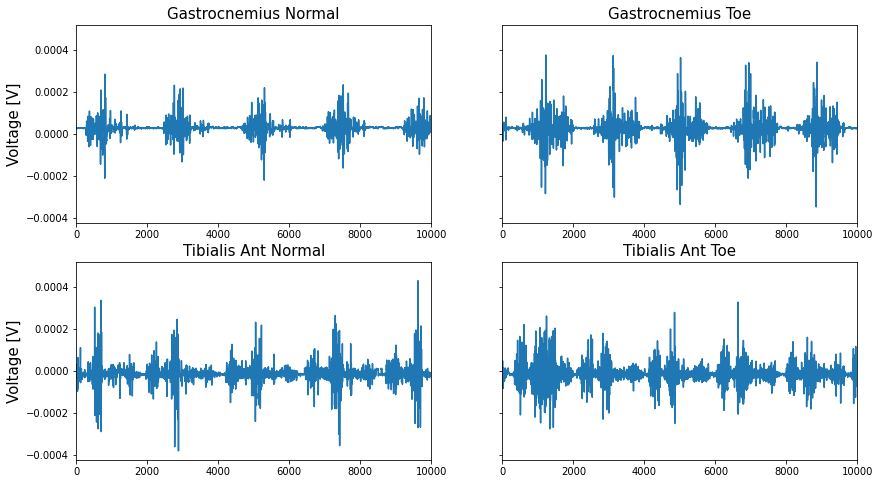

In [29]:
fig, ((ax0, ax1), (ax2,ax3)) = plt.subplots(2,2, figsize = (14,8),sharey=True)
ax0.plot(ENG), ax0.set_title('Gastrocnemius Normal', fontsize=15), ax0.set_xlim(0,10000), ax0.set_ylabel('Voltage [V]', fontsize=15)
ax1.plot(ETG), ax1.set_title('Gastrocnemius Toe', fontsize=15), ax1.set_xlim(0,10000)
ax2.plot(ENT), ax2.set_title('Tibialis Ant Normal', fontsize=15), ax2.set_xlim(0,10000), ax2.set_ylabel('Voltage [V]', fontsize=15)
ax3.plot(ETT), ax3.set_title('Tibialis Ant Toe', fontsize=15), ax3.set_xlim(0,10000)
plt.show()

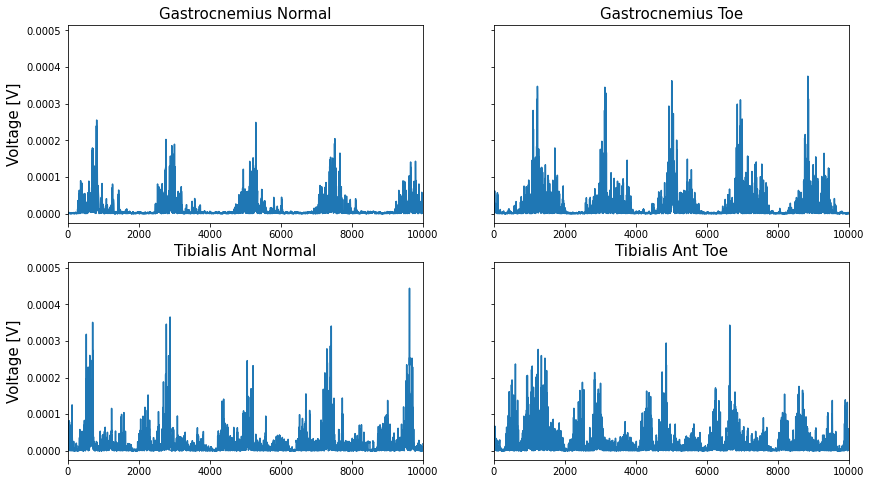

In [30]:
ENG = ENG - np.mean(ENG)
ENT = ENT - np.mean(ENT)
ETG = ETG - np.mean(ETG)
ETT = ETT - np.mean(ETT)
ENG, ENT, ETG, ETT = abs(ENG), abs(ENT), abs(ETG), abs(ETT)

fig, ((ax0, ax1), (ax2,ax3)) = plt.subplots(2,2, figsize = (14,8),sharey=True)
ax0.plot(ENG), ax0.set_title('Gastrocnemius Normal', fontsize=15), ax0.set_xlim(0,10000), ax0.set_ylabel('Voltage [V]', fontsize=15)
ax1.plot(ETG), ax1.set_title('Gastrocnemius Toe', fontsize=15), ax1.set_xlim(0,10000)
ax2.plot(ENT), ax2.set_title('Tibialis Ant Normal', fontsize=15), ax2.set_xlim(0,10000), ax2.set_ylabel('Voltage [V]', fontsize=15)
ax3.plot(ETT), ax3.set_title('Tibialis Ant Toe', fontsize=15), ax3.set_xlim(0,10000)
plt.show()

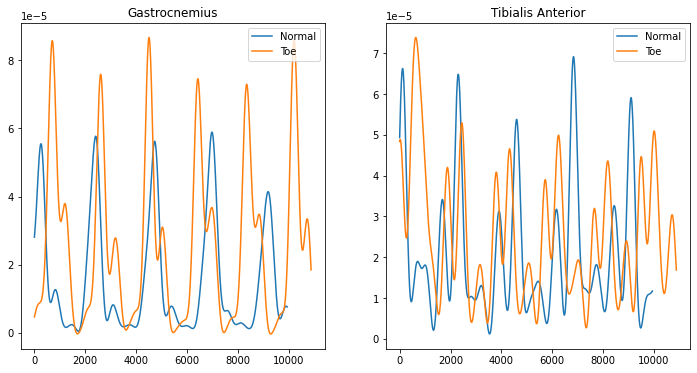

In [12]:
lp = 2 #low pass frequency

ENGb, ENGa = sg.butter(4,lp, fs = 1000)
ENTb, ENTa = sg.butter(4,lp, fs = 1000)
ETGb, ETGa = sg.butter(4,lp, fs = 1000)
ETTb, ETTa = sg.butter(4,lp, fs = 1000)

ENGF = sg.filtfilt(ENGb, ENGa, ENG)[500:-500] #ENG Filtered
ENTF = sg.filtfilt(ENTb, ENTa, ENT)[500:-500] #ENG Filtered
ETGF = sg.filtfilt(ETGb, ETGa, ETG)[500:-500] #ENG Filtered
ETTF = sg.filtfilt(ETTb, ETTa, ETT)[500:-500] #ENG Filtered

fig, (ax0, ax1) = plt.subplots(1,2, figsize = (12,6))
ax0.plot(ENGF), ax0.plot(ETGF), ax0.legend(['Normal', 'Toe']) ,ax0.set_title('Gastrocnemius')
ax1.plot(ENTF), ax1.plot(ETTF), ax1.legend(['Normal', 'Toe']) ,ax1.set_title('Tibialis Anterior')
plt.show()